In [1]:
#https://medium.com/dataman-in-ai/a-tutorial-on-quantile-regression-quantile-random-forests-and-quantile-gbm-d3c651af7516


### Quantile Random Forests

In [2]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_boston


#data visualization
import matplotlib.pyplot as plt 

#ml
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#ml metrics
from sklearn import metrics




#get data
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# Standardize the data
X_scaled = pd.DataFrame(preprocessing.scale(boston))
Y_scaled = preprocessing.scale(boston_dataset.target) #not necessary to standardize the target.
X_scaled.columns = boston.columns

#get train and test features and target
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.2, random_state=5)

#build random forest
rf = RandomForestRegressor(n_estimators=200, random_state=0,min_samples_split=10)
rf.fit(X_train, Y_train)


# Get the predictions of all trees for all observations (where each observation has N predictions from the N trees)
pred_Q = pd.DataFrame()
for pred in rf.estimators_:
    temp = pd.Series(pred.predict(X_test).round(2))
    pred_Q = pd.concat([pred_Q,temp], axis=1)
pred_Q.head()

/Users/pauljacob/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

/Users/pauljacob/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/pauljacob/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/pauljacob/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/pauljacob/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/pauljacob/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/pauljacob/opt/anaconda3/lib/python3.9/site-

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,2.87,2.99,2.39,2.40,2.91,2.76,2.52,2.80,2.56,2.60,...,2.20,2.24,2.28,2.56,2.99,1.96,2.99,2.90,2.44,2.61
1,0.48,0.39,0.16,1.04,0.39,0.56,0.42,0.65,1.38,0.93,...,0.86,0.38,0.86,0.70,1.06,0.73,0.71,0.62,1.08,0.09
2,-0.02,0.02,0.11,-0.08,0.06,0.10,0.12,0.11,-0.07,-0.06,...,-0.02,0.29,-0.01,0.06,0.10,0.22,-0.03,0.31,0.09,0.14
3,-1.18,-0.95,-1.29,-1.23,-1.31,-0.95,-1.04,-1.05,-1.36,-1.56,...,-0.98,-0.72,-1.74,-1.68,-1.10,-1.20,-1.62,-1.03,-1.01,-1.09
4,2.47,1.31,2.08,2.40,2.32,2.34,2.00,1.84,0.99,2.96,...,2.20,1.36,2.28,2.56,1.18,2.52,1.05,2.25,2.44,2.61


In [3]:
#<<<<<<<<add code up to here????

In [4]:
RF_actual_pred = pd.DataFrame()

quantiles = [0.01, 0.05, 0.50, 0.95 , 0.99]
for q in quantiles:
    s = pred_Q.quantile(q=q, axis=1)
    RF_actual_pred = pd.concat([RF_actual_pred,s],axis=1,sort=False)
RF_actual_pred.head()

,0.01,0.05,0.50,0.95,0.99
0,2.0491,2.1395,2.670,2.9900,2.9900
1,0.0593,0.1295,0.620,0.9700,1.1400
2,-0.2314,-0.1800,0.005,0.3115,0.7104
3,-1.7701,-1.6705,-1.105,-0.8290,-0.5992
4,0.1892,0.9680,2.250,2.8130,2.9600


In [5]:
RF_actual_pred = pd.DataFrame()

for q in quantiles:
    s = pred_Q.quantile(q=q, axis=1)
    RF_actual_pred = pd.concat([RF_actual_pred,s],axis=1,sort=False)
   
RF_actual_pred.columns=quantiles
RF_actual_pred['actual'] = Y_test
RF_actual_pred['interval'] = RF_actual_pred[np.max(quantiles)] - RF_actual_pred[np.min(quantiles)]
RF_actual_pred = RF_actual_pred.sort_values('interval')
RF_actual_pred = RF_actual_pred.round(2)
RF_actual_pred

,0.01,0.05,0.5,0.95,0.99,actual,interval
11,-0.46,-0.40,-0.28,0.00,0.15,-0.38,0.61
100,-0.46,-0.41,-0.18,0.00,0.17,0.05,0.63
27,-0.50,-0.44,-0.32,0.01,0.13,-0.15,0.63
5,-1.80,-1.75,-1.61,-1.39,-1.15,-1.32,0.65
26,-0.06,0.01,0.16,0.31,0.61,0.06,0.67
...,...,...,...,...,...,...,...
74,-1.05,-0.84,2.99,2.99,2.99,0.58,4.04
33,-1.32,-1.07,-0.72,2.99,2.99,-0.52,4.31
92,-1.33,-0.83,-0.21,0.00,2.99,-0.12,4.32
19,-1.34,-1.17,-0.00,2.99,2.99,-0.82,4.33


In [6]:
r2 = metrics.r2_score(RF_actual_pred['actual'], RF_actual_pred[0.5]).round(2)
print('R2 score is {}'.format(r2) )

R2 score is 0.81


In [7]:
def correctPcnt(df):
    correct = 0
    obs = df.shape[0]
    for i in range(obs):
        if df.loc[i,0.01] <= df.loc[i,'actual'] <= df.loc[i,0.99]:
            correct += 1
    print(correct/obs)
    
correctPcnt(RF_actual_pred)

0.9509803921568627


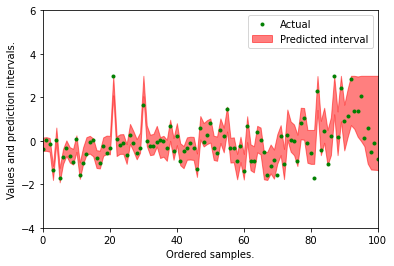

In [8]:
def showIntervals(df):  
    df = df.reset_index(drop='index')
    plt.plot(df['actual'],'go',markersize=3,label='Actual')
    plt.fill_between(
        np.arange(df.shape[0]), df[0.01], df[0.99], alpha=0.5, color="r",
        label="Predicted interval")
    plt.xlabel("Ordered samples.")
    plt.ylabel("Values and prediction intervals.")
    plt.xlim([0, 100])
    plt.ylim([-4, 6])
    plt.legend()
    plt.show()
    
showIntervals(RF_actual_pred)